Various Modules used.

In [25]:
import numpy as np
import pandas as pd
import os, sys
import re, string
import operator
from sklearn import model_selection

In [26]:
all_class_list = os.listdir(r'C:\Users\91829\Desktop\20_newsgroups')
all_class_list

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [44]:
X = []
Y = []
path = r"C:\Users\91829\Desktop\20_newsgroups"
for target in all_class_list:
    # go to each class document
    each_class_document = os.path.join(path , target)     
    for doc in os.listdir(each_class_document):
        # now open each file
        with open(os.path.join(each_class_document,doc)) as file:
            # append first value as document_name and second value as document_text in X
            X.append((doc, file.read()))
           # append class_name in Y
            Y.append(target)

In [43]:
# total number of  datapoints
len(Y)

19997

In [45]:
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>


In [28]:
print(X[0])

('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resourc

In [34]:
#These are the stop_words in common taken from internet.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [35]:
len(stop_word)

153

#X is a list  of tuples , where first element is name of document and second is the text in documents present in each document of each category in main folder.
#Y is the category or classes.

In [36]:
#splitting the data in training and testing
x_train,x_test,y_train,y_test = model_selection.train_test_split(X,Y)

In [37]:
#split has done in nearly 7:3 ratio
print(len(x_train))
print(len(x_test))

14997
5000


In [38]:
#Example for showing re.split
import re
sample_text="Hey! I am Janvi Rustagi. I am superb. My Passwards is => @Janvi@786@ all ID"
print(re.split('\W+',sample_text))

['Hey', 'I', 'am', 'Janvi', 'Rustagi', 'I', 'am', 'superb', 'My', 'Passwards', 'is', 'Janvi', '786', 'all', 'ID']


In [47]:
word = x_train[0][1].lower()  #convert capital letter to small letter.
word

'xref: cantaloupe.srv.cs.cmu.edu comp.unix.dos-under-unix:444 comp.sys.ibm.pc.misc:34192 comp.os.ms-windows.apps:11651 comp.os.ms-windows.misc:9608 alt.uu.comp.os.linux.questions:216 comp.apps.spreadsheets:1157 comp.misc:20379 alt.os.linux:2919 comp.os.linux:37309\npath: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!agate!dog.ee.lbl.gov!network.ucsd.edu!munnari.oz.au!metro!sunb.ocs.mq.edu.au!macadam.mpce.mq.edu.au!eugene\nfrom: eugene@mpce.mq.edu.au\nnewsgroups: comp.unix.dos-under-unix,comp.sys.ibm.pc.misc,comp.sys.ibm.pc.net,comp.os.ms-windows.apps,comp.os.ms-windows.misc,alt.uu.comp.os.linux.questions,comp.apps.spreadsheets,comp.misc,alt.os.linux,comp.os.linux,man.linux\nsubject: re: wp-pcf, linux, risc?\ndate: 19 apr 1993 13:20:13 gmt\norganization: macquarie university, australia.\nlines: 18\nsender: eugene@mpce.mq.edu.au\nmessage-id: <1qu8ud$2hd@sunb.ocs.mq.edu.au>\nreferences: <c56heo.kka@ccu.umanitoba.ca> <c5o1yq.m34@csie.nctu.edu.tw>\nnntp-

In [48]:
stripped=re.split(r'\W+',word)
stripped

['xref',
 'cantaloupe',
 'srv',
 'cs',
 'cmu',
 'edu',
 'comp',
 'unix',
 'dos',
 'under',
 'unix',
 '444',
 'comp',
 'sys',
 'ibm',
 'pc',
 'misc',
 '34192',
 'comp',
 'os',
 'ms',
 'windows',
 'apps',
 '11651',
 'comp',
 'os',
 'ms',
 'windows',
 'misc',
 '9608',
 'alt',
 'uu',
 'comp',
 'os',
 'linux',
 'questions',
 '216',
 'comp',
 'apps',
 'spreadsheets',
 '1157',
 'comp',
 'misc',
 '20379',
 'alt',
 'os',
 'linux',
 '2919',
 'comp',
 'os',
 'linux',
 '37309',
 'path',
 'cantaloupe',
 'srv',
 'cs',
 'cmu',
 'edu',
 'das',
 'news',
 'harvard',
 'edu',
 'noc',
 'near',
 'net',
 'howland',
 'reston',
 'ans',
 'net',
 'agate',
 'dog',
 'ee',
 'lbl',
 'gov',
 'network',
 'ucsd',
 'edu',
 'munnari',
 'oz',
 'au',
 'metro',
 'sunb',
 'ocs',
 'mq',
 'edu',
 'au',
 'macadam',
 'mpce',
 'mq',
 'edu',
 'au',
 'eugene',
 'from',
 'eugene',
 'mpce',
 'mq',
 'edu',
 'au',
 'newsgroups',
 'comp',
 'unix',
 'dos',
 'under',
 'unix',
 'comp',
 'sys',
 'ibm',
 'pc',
 'misc',
 'comp',
 'sys',
 'ibm

In [40]:
# checking for alphabets
string = 'Ayush'
print(string.isalpha())

string = 'Ayush0212'
print(string.isalpha())

# checking if space is an alphabet
string = 'Ayush Saxena'
print( string.isalpha())

True
False
False


In [49]:
#Making Dictionary of words with their corresponding frequency
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word = x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'xref': 4543,
 'cantaloupe': 19531,
 'srv': 24224,
 'cmu': 39277,
 'edu': 123055,
 'comp': 9880,
 'unix': 1401,
 'dos': 1778,
 'sys': 3101,
 'ibm': 3299,
 'misc': 8862,
 'windows': 5795,
 'apps': 492,
 'alt': 5928,
 'linux': 215,
 'questions': 1161,
 'spreadsheets': 23,
 'path': 15293,
 'das': 4561,
 'news': 25694,
 'harvard': 5214,
 'noc': 4647,
 'near': 5162,
 'net': 19154,
 'howland': 8226,
 'reston': 8203,
 'ans': 8312,
 'agate': 1321,
 'dog': 421,
 'lbl': 265,
 'gov': 3653,
 'network': 1423,
 'ucsd': 756,
 'munnari': 271,
 'metro': 86,
 'sunb': 53,
 'ocs': 94,
 'macadam': 57,
 'mpce': 56,
 'eugene': 77,
 'newsgroups': 15293,
 'man': 1522,
 'subject': 16188,
 'pcf': 13,
 'risc': 121,
 'date': 15576,
 'apr': 15341,
 'gmt': 13338,
 'organization': 14904,
 'macquarie': 24,
 'university': 7447,
 'australia': 319,
 'lines': 15686,
 'sender': 8304,
 'message': 16446,
 'references': 9774,
 'kka': 17,
 'ccu': 133,
 'umanitoba': 205,
 'csie': 31,
 'nctu': 58,
 'nntp': 7061,
 'posting': 735

In [50]:
#Sorting the dictionary on basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

# Here's what sorted dictionary might look like after sorting. 
# sorted_dic = [('the', 5), ('apple', 4), ('is', 3), ('red', 2), ('and', 1)]

[('edu', 123055),
 ('cmu', 39277),
 ('com', 37611),
 ('news', 25694),
 ('not', 24898),
 ('srv', 24224),
 ('cantaloupe', 19531),
 ('net', 19154),
 ('message', 16446),
 ('subject', 16188),
 ('lines', 15686),
 ('date', 15576),
 ('apr', 15341),
 ('path', 15293),
 ('newsgroups', 15293),
 ('organization', 14904),
 ('can', 14835),
 ('state', 14155),
 ('gmt', 13338),
 ('ohio', 11960),
 ('one', 11648),
 ('will', 11203),
 ('writes', 11115),
 ('article', 10120),
 ('comp', 9880),
 ('references', 9774),
 ('talk', 9160),
 ('misc', 8862),
 ('ans', 8312),
 ('sender', 8304),
 ('howland', 8226),
 ('reston', 8203),
 ('don', 8129),
 ('like', 7771),
 ('people', 7740),
 ('just', 7563),
 ('university', 7447),
 ('posting', 7358),
 ('nntp', 7061),
 ('mps', 6961),
 ('know', 6912),
 ('host', 6713),
 ('sci', 6496),
 ('get', 6428),
 ('usenet', 6258),
 ('zaphod', 6255),
 ('think', 6231),
 ('may', 6049),
 ('alt', 5928),
 ('politics', 5868),
 ('windows', 5795),
 ('also', 5571),
 ('rutgers', 5290),
 ('time', 5279),
 (

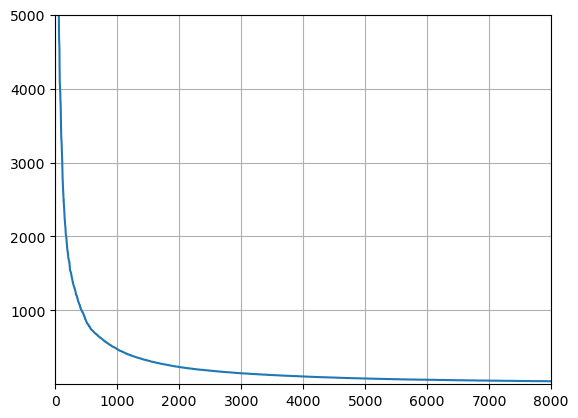

In [51]:
import matplotlib.pyplot as plt
#Plotting graph on no. of words vs their frequency 
#On basis of graph we can decide the number of features we want to take
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()   

In [52]:
#We decided to take top 2000 words with max freuqency as our feature
#here feature list is answer1
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'path',
 'newsgroups',
 'organization',
 'can',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'ans',
 'sender',
 'howland',
 'reston',
 'don',
 'like',
 'people',
 'just',
 'university',
 'posting',
 'nntp',
 'mps',
 'know',
 'host',
 'sci',
 'get',
 'usenet',
 'zaphod',
 'think',
 'may',
 'alt',
 'politics',
 'windows',
 'also',
 'rutgers',
 'time',
 'harvard',
 'eng',
 'use',
 'near',
 'new',
 'rec',
 'soc',
 'good',
 'well',
 'noc',
 'crabapple',
 'sei',
 'system',
 'das',
 'xref',
 'cis',
 'now',
 'even',
 'see',
 'europa',
 'gtefsd',
 'ece',
 'uunet',
 'god',
 'religion',
 'way',
 'world',
 'org',
 'two',
 'make',
 'say',
 'many',
 'much',
 'first',
 'christian',
 'gov',
 'rochester',
 'right',
 'distribution',
 'club',
 'mail',
 'space',
 'want',
 'andrew',
 'gatech',
 'ibm',
 'anyone',
 'magnes

In [56]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [58]:
# Making x_test dataset
# number of rows is equivalent to rows in x_test and columns is equal to length of (feature list).
x_test_dataset = np.zeros([len(x_test), len(answer1)], int)
for i in range(len(x_test)) :
    words1 = x_test[i][1].lower()
    word1 = re.split(r'\w+', words1)
    # iterating over each word
    for j in word1 :
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [59]:
#printing x_train and x_test dataset 
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[15  2  0 ...  0  0  0]
 [12  2  1 ...  0  0  0]
 [ 1  1  0 ...  0  0  0]
 ...
 [ 8  3  2 ...  0  0  0]
 [ 9  3  4 ...  0  0  0]
 [ 7  1  0 ...  0  0  0]]
--------------------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [63]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print('confusion_matrix')
print(confusion_matrix(y_test,y_pred))
print('classification_report')
print(classification_report(y_test,y_pred))
print('accuracy score')
print(accuracy_score(y_test, y_pred) * 100 ,"%", sep = " ")

Score on training data: 0.8925118357004734
Score on testing data: 0.0458
confusion_matrix
[[  0   0   0   0   0   0   0   0   0   0   0   0 241   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 241   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 243   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 259   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 265   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 232   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 264   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 257   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 265   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 238   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 246   0   

C:\Users\91829\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91829\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91829\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Self Implementation of Naive Baye's.

In [64]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with class corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count

In [65]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob
    

In [66]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [67]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [68]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [69]:
#This cell will take time to execute
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)

In [70]:
dictionary

{'total_doc': 14997,
 'rec.sport.baseball': {'edu': 6744,
  'cmu': 1358,
  'com': 1682,
  'news': 1573,
  'not': 912,
  'srv': 899,
  'cantaloupe': 773,
  'net': 1069,
  'message': 783,
  'subject': 793,
  'lines': 775,
  'date': 778,
  'apr': 828,
  'path': 769,
  'newsgroups': 766,
  'organization': 777,
  'can': 537,
  'state': 518,
  'gmt': 696,
  'ohio': 472,
  'one': 445,
  'will': 402,
  'writes': 649,
  'article': 594,
  'comp': 26,
  'references': 578,
  'talk': 52,
  'misc': 5,
  'ans': 453,
  'sender': 482,
  'howland': 436,
  'reston': 436,
  'don': 432,
  'like': 344,
  'people': 153,
  'just': 363,
  'university': 397,
  'posting': 380,
  'nntp': 393,
  'mps': 298,
  'know': 297,
  'host': 356,
  'sci': 26,
  'get': 302,
  'usenet': 401,
  'zaphod': 263,
  'think': 358,
  'may': 160,
  'alt': 1,
  'politics': 4,
  'windows': 0,
  'also': 198,
  'rutgers': 31,
  'time': 348,
  'harvard': 328,
  'eng': 155,
  'use': 42,
  'near': 287,
  'new': 185,
  'rec': 819,
  'soc': 15

In [71]:
len(dictionary)

21

In [72]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [73]:
print("Classification report")
print(classification_report(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print()
print("Accuracy Score")
print(accuracy_score(y_test, y_pred)*100, '%', sep="")

Classification report
                          precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00       241
           comp.graphics       0.00      0.00      0.00       241
 comp.os.ms-windows.misc       0.00      0.00      0.00       243
comp.sys.ibm.pc.hardware       0.00      0.00      0.00       259
   comp.sys.mac.hardware       0.00      0.00      0.00       265
          comp.windows.x       0.00      0.00      0.00       232
            misc.forsale       0.00      0.00      0.00       264
               rec.autos       0.00      0.00      0.00       257
         rec.motorcycles       0.00      0.00      0.00       265
      rec.sport.baseball       0.00      0.00      0.00       238
        rec.sport.hockey       0.00      0.00      0.00       246
               sci.crypt       0.00      0.00      0.00       274
         sci.electronics       0.05      1.00      0.09       229
                 sci.med       0.00      0.00      0.

C:\Users\91829\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91829\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91829\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
print("Score on testing_data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on testing_data: 0.0458
[[  0   0   0   0   0   0   0   0   0   0   0   0 241   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 241   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 243   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 259   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 265   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 232   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 264   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 257   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 265   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 238   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 246   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0  

C:\Users\91829\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91829\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91829\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
